Hypothesis: The number of calls is correlated to the problems the district is facing. 
More calls - more problems or is there misrepresentation, i.e lack of awarness in areas with less calls. The problems can be quantified from the suicide data 

In [94]:
import urllib
import json
import psycopg2
import pandas as pd

import numpy as np
import requests
import json
import urllib
import json
import pandas as pd
import seaborn as sns

from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
f = open('../kcc_key.txt', 'r')
key = f.readlines()[0]

In [29]:
conn = psycopg2.connect(host="localhost",database="KisanCallCenter", 
                                user="postgres", password=key)
kcc = pd.read_sql("SELECT * FROM kcc;", con=conn)

In [23]:
conn.commit()

In [32]:
kcc.head(2)

,call_id,blockname,category,createdon,crop,districtname,kccans,query,querytype,season,sector,statename
0,1,BORIVALI,Others,2015-01-08 15:34:18.207,Others,Mumbai Suburban,Your Registration process successfully completed.,Asked About SMS Activation?,Agriculture Mechanization,RABI,AGRICULTURE,MAHARASHTRA
1,2,BORIVALI,Fiber Crops,2015-01-26 19:19:02.660,Cotton (Kapas),Mumbai Suburban,24:24:00 Two Bags 00:00:05 one Bag Mahadan Sh...,fertilizer info.,Fertilizer Use and Availability,RABI,AGRICULTURE,MAHARASHTRA


In [38]:
len(kcc.blockname.unique())

352

In [39]:
len(kcc.districtname.unique())

35

# Clean the Sector naming - "Fishries" renamed to "Fisheries

In [57]:
kcc.loc[kcc.sector =='FISHRIES', 'sector'] = 'FISHERIES'

# Let's look at the number of calls by different parameters

Agricultural Seasons in Maharashtra: In Maharashtra whole year is divided into three seasons as follows:
1. Kharif / Monsoon/Rainy season: 15 June to 15 October.
2. Winter/Rabi/Cool season: 15 October to 15 February.
3. Summer season: 15 February to 15 June.

http://www.agriinfo.in/default.aspx?page=topic&superid=1&topicid=310

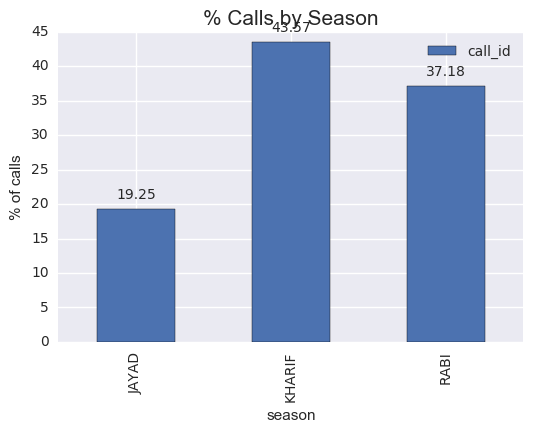

In [100]:
ax = kcc.groupby('season').agg({'call_id':'count'}).apply(lambda x: 100 * x / float(x.sum())).plot.bar()
ax.set_ylabel('% of calls')
ax.set_title("% Calls by Season", size = 15)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

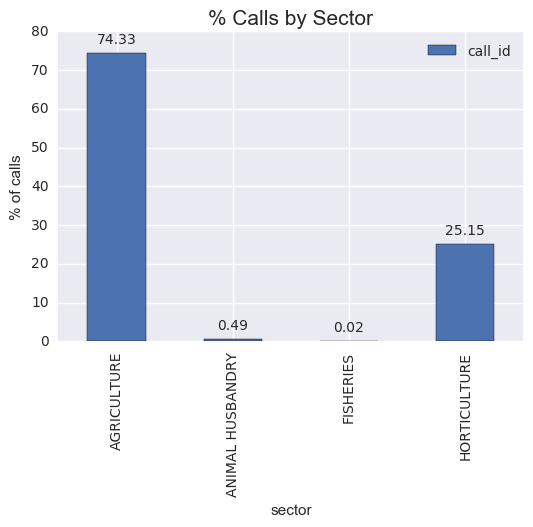

In [97]:
ax= kcc.groupby('sector').agg({'call_id':'count'}).apply(lambda x: 100 * x / float(x.sum())).plot.bar()
ax.set_ylabel('% of calls')
ax.set_title("% Calls by Sector", size = 15)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

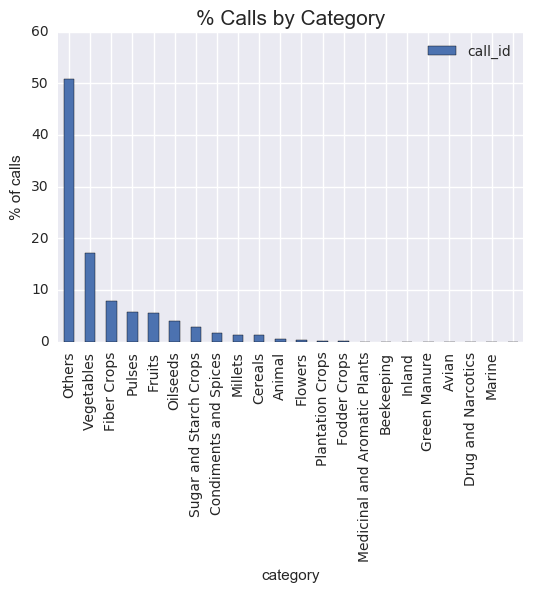

In [118]:
ax= kcc.groupby('category').agg({'call_id':'count'}).\
apply(lambda x: 100 * x / float(x.sum())).\
sort_values('call_id', ascending=False).plot.bar()
ax.set_ylabel('% of calls')
ax.set_title("% Calls by Category", size = 15)